# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

# 📘 Data Dictionary

This dataset contains a mix of categorical and numerical variables. The table below describes each column:

| Variable           | Description                                                                                   | Type                | Notes                                                                 |
|--------------------|-----------------------------------------------------------------------------------------------|---------------------|-----------------------------------------------------------------------|
| Type               | The type of transaction (e.g., PAYMENT, TRANSFER)                                             | Categorical          | Use one-hot or label encoding if needed                              |
| Amount             | The amount of money transferred                                                               | Float                | Transaction value; key numeric predictor                              |
| NameOrig           | Origin account name                                                                           | String               | Likely to be dropped (ID info)                                       |
| OldBalanceOrig     | Origin account balance before the transaction                                                 | Float                | Consider for numeric modeling                                        |
| NewBalanceOrig     | Origin account balance after the transaction                                                  | Float                | Consider for delta calculations                                      |
| NameDest           | Destination account name                                                                      | String               | Likely to be dropped (ID info)                                       |
| OldbalanceDest     | Destination account balance before the transaction                                            | Float                | May be informative; assess correlation                               |
| NewbalanceDest     | Destination account balance after the transaction                                             | Float                | May be informative; assess correlation                               |
| IsFlaggedFraud     | Naive rule-based fraud flag (1 if amount > 200,000)                                           | Binary (0 = No, 1 = Yes) | Consider excluding to avoid data leakage                      |
| IsFraud            | Was this transaction actually fraudulent?                                                     | Binary (0 = No, 1 = Yes) | **Target variable**—used for classification                     |

## 📝 Notes:
- This is a simulated fraud detection dataset.
- All bank account identifiers (*NameOrig*, *NameDest*) should be dropped for modeling to prevent overfitting and protect privacy.
- Focus on numeric predictors like *Amount*, *OldBalanceOrig*, *NewBalanceOrig*, *OldbalanceDest*, and *NewbalanceDest*.
- *IsFlaggedFraud* is a simplistic rule—avoid using it in predictive models unless for benchmarking.



In [45]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")


In [47]:
# TODO:
transactions

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0


In [48]:
# TODO: view the first 5 rows of data
transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [49]:
# TODO: view the last 5 rows of data
transactions.tail()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0
999999,CASH_OUT,51379.41,C2103541974,45503.43,0.00,C924733771,202760.18,254139.59,0,0


In [50]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [51]:
# TODO: Standardizing column names
transactions =  transactions.rename(columns={'oldbalanceOrg' : 'oldbalanceOrig'})

In [52]:
# TODO: view the first 5 rows of your data
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [53]:
# TODO: view structure of data
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrig  1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [54]:
# TODO: check for null values 
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [55]:
# TODO: Describe
transactions.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [56]:
# TODO: Validation of Null Values
missing = transactions.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [57]:
# TODO: Remove duplicates if present
transactions.drop_duplicates(inplace=True)

In [58]:
# TODO: Isolate rows 
transactions [transactions['isFlaggedFraud'] == 1]

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
564103,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1


In [59]:
# TODO:Check for class imbalance
fraud_counts = transactions['isFraud'].value_counts(normalize=True)
print("Fraud class balance:\n", fraud_counts)

Fraud class balance:
 isFraud
0    0.998703
1    0.001297
Name: proportion, dtype: float64


## 🔍 Univariate Analysis

C:\Users\adiaz\AppData\Local\Temp\ipykernel_19548\660318435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, x='type', order=transactions['type'].value_counts().index,


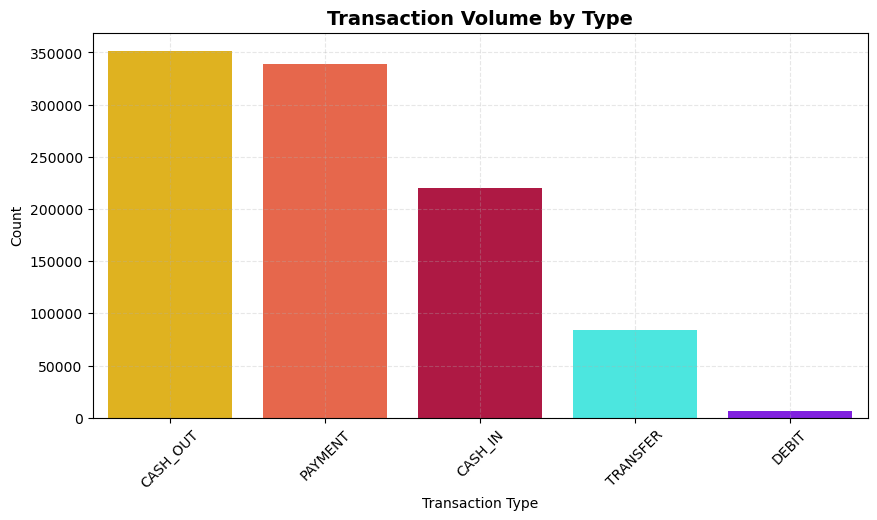

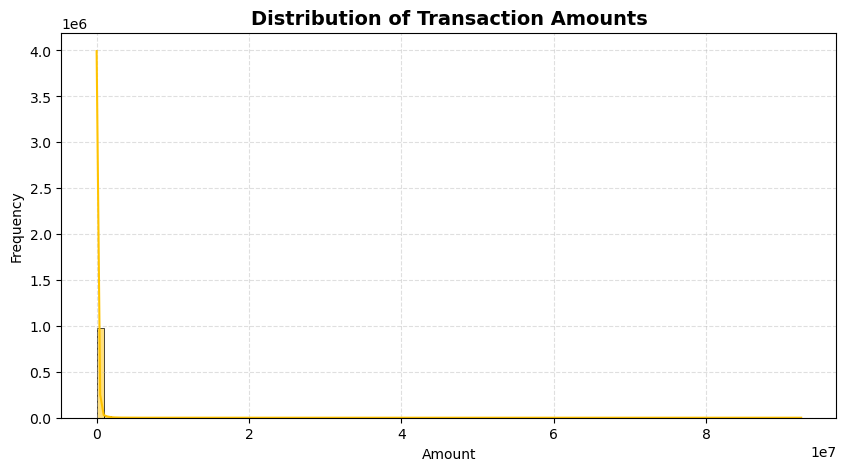

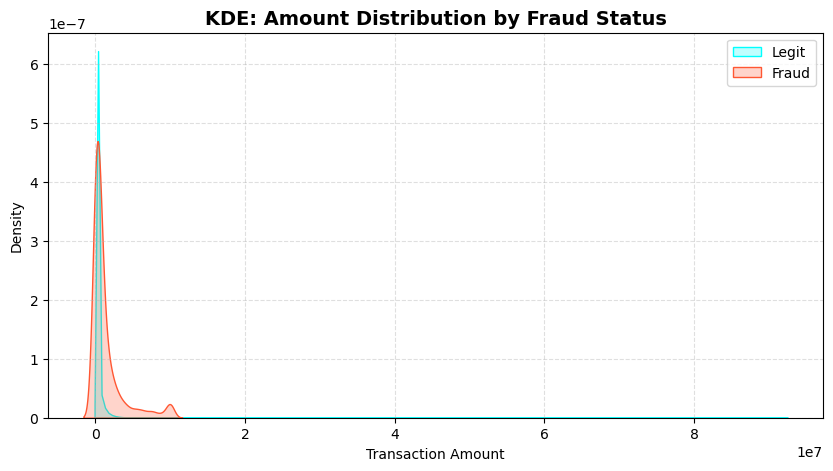

C:\Users\adiaz\AppData\Local\Temp\ipykernel_19548\660318435.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_type, x='type', y='isFraud', palette=['#00FFFF', '#FFC300', '#FF5733', '#C70039', '#8000FF'])


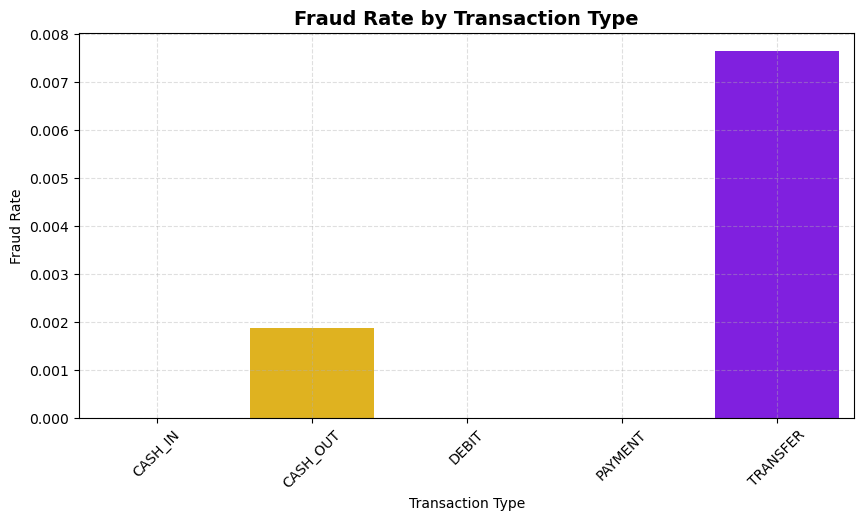

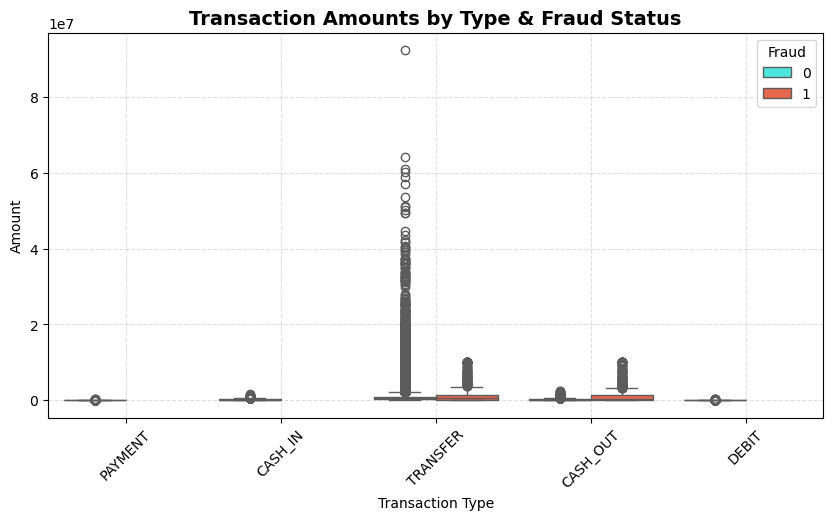

In [ ]:
# TODO: Begin your EDA

# Count transactions per type
plt.figure(figsize=(10, 5))
sns.countplot(data=transactions, x='type', order=transactions['type'].value_counts().index,
              palette=['#FFC300', '#FF5733', '#C70039', '#33FFF6', '#8000FF'])
plt.title("Transaction Volume by Type", fontsize=14, fontweight='bold')
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(data=transactions, x='amount', bins=100, kde=True, color='#FFC300')  # yellow = volume
plt.title("Distribution of Transaction Amounts", fontsize=14, fontweight='bold')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# KDE plot of amount by fraud class
plt.figure(figsize=(10, 5))
sns.kdeplot(data=transactions[transactions['isFraud'] == 0], x='amount', fill=True, label='Legit', color='#00FFFF')
sns.kdeplot(data=transactions[transactions['isFraud'] == 1], x='amount', fill=True, label='Fraud', color='#FF5733')
plt.title("KDE: Amount Distribution by Fraud Status", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Fraud rate per transaction type
fraud_by_type = transactions.groupby('type')['isFraud'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=fraud_by_type, x='type', y='isFraud', palette=['#00FFFF', '#FFC300', '#FF5733', '#C70039', '#8000FF'])
plt.title("Fraud Rate by Transaction Type", fontsize=14, fontweight='bold')
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Boxplot: Amount by Type with Fraud Hue
plt.figure(figsize=(10, 5))
sns.boxplot(data=transactions, x='type', y='amount', hue='isFraud',
            palette={0: '#33FFF6', 1: '#FF5733'})  # teal = legit, orange = fraud
plt.title("Transaction Amounts by Type & Fraud Status", fontsize=14, fontweight='bold')
plt.ylabel("Amount")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.legend(title="Fraud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Crosstab to compare flagged vs true fraud
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(transactions['isFraud'], transactions['isFlaggedFraud'], normalize='index')

plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("System Flag (isFlaggedFraud) vs Actual Fraud", fontsize=14, fontweight='bold')
plt.xlabel("isFlaggedFraud")
plt.ylabel("isFraud")
plt.grid(False)
plt.show()


## 📊 EDA Summary: Key Insights on Fraud Patterns

- **Transaction Volume** is dominated by `PAYMENT` and `CASH_OUT`, but **fraud is highly concentrated** in just `TRANSFER` and `CASH_OUT`.

- **Amount Distribution** shows that most legitimate transactions are small, while fraudulent ones spike sharply in higher ranges.

- **System Flag (`isFlaggedFraud`) fails** to detect the vast majority of real fraud cases. It relies only on high amounts, which many fraudsters bypass.

- **Interaction patterns matter** — fraud is more likely when high amounts coincide with specific transaction types (`TRANSFER`, `CASH_OUT`).

- **Balance logic breaks** (like mismatches between balances before/after transactions) may offer predictive signal — prime candidates for feature engineering.

> **This suggests** a stronger, behavior-based classification model is needed — one that captures fraud through patterns, not just price tags.

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here